### Your name:

<pre> Aaron Fritz</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


## TensorFlow

Implement Logistic Regression using TensorFlow. Train it and evaluate it on the moons dataset (introduced in Chapter 5). 

use this as reference:
https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/



In [21]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

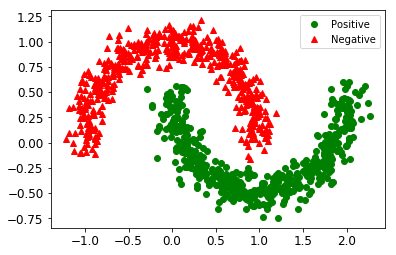

In [48]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

In [49]:
# Feature Matrix 
x_orig = X_moons.reshape(-1,2) 
  
# Data labels 
y_orig = y_moons.reshape(-1,1)
  
print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape) 

Shape of Feature Matrix: (1000, 2)
Shape Label Vector: (1000, 1)


In [50]:
from sklearn.preprocessing import OneHotEncoder 

# Creating the One Hot Encoder 
oneHot = OneHotEncoder(categories='auto') 
  
# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
  
# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
  
alpha, epochs = 0.0035, 500
m, n = x.shape 
print('m =', m) 
print('n =', n) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs)

m = 1000
n = 2000
Learning Rate = 0.0035
Number of Epochs = 500


In [51]:
# There are n columns in the feature matrix 
# after One Hot Encoding. 
X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 

In [52]:
# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = Y_hat, labels = Y) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
         learning_rate = alpha).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [53]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
          
        # Running the Optimizer 
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Calculating cost on current Epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if epoch % 100 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%") 

Epoch 100 Cost: 1384.5169677734375
Epoch 200 Cost: 1381.365966796875
Epoch 300 Cost: 1377.0806884765625
Epoch 400 Cost: 1370.378662109375

Accuracy: 100.0 %


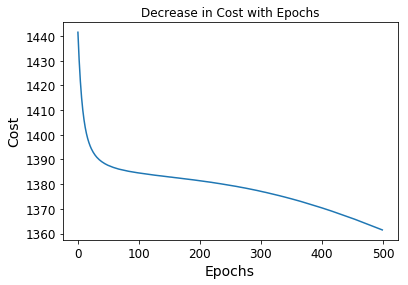

In [54]:
#plot the change of cost over the epochs.
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

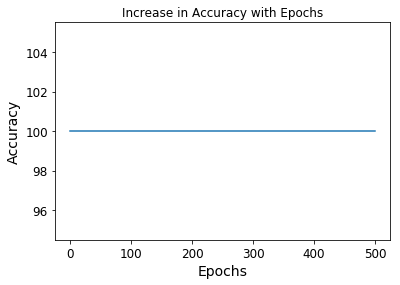

In [55]:
#Plot the change of accuracy over the epochs
plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 
  
plt.show() 

In [56]:
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), np.max(x_orig[:, 0])]) 
  
decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias) 
  
decision_boundary_y = [sum(decision_boundary_y[:, 0]), sum(decision_boundary_y[:, 1])] 
  
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 0]) 

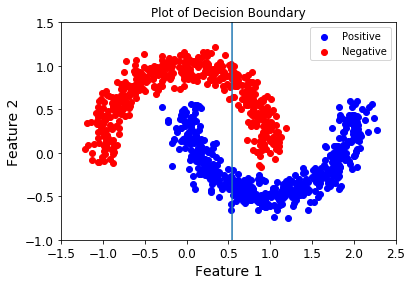

In [62]:
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
  color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
   color = 'red', label = 'Negative') 
  
# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.ylim(-1, 1.5)
plt.xlim(-1.5, 2.5)
plt.legend() 
  
plt.show() 